<a href="https://colab.research.google.com/github/estevaofuzaro98/dinamicaPPGEM/blob/main/Dinamica_TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Universidade Estadual Paulista - UNESP**
>
> **Faculdade de Engenharia de Ilha Solteira - FEIS**
>
> **Departamento de Engenharia Mecânica - DEM**
>
> **Programa de Pós-Graduação em Engenharia Mecânica - PPGEM**
>
> ---
>
> **DINÂMICA DOS SISTEMAS MECÂNICOS**
>
> **TRABALHO FINAL**
>
> **Docente:** Samuel da Silva
>
> **Discentes:** Estevão Fuzaro de Almeida & Henrique Cordeiro Novais

---

In [1]:
!sudo dpkg --configure -a
!sudo apt-get update --fix-missing
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super # plot with latex fonts
!pip install colorblind

# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
import os
from scipy.integrate import odeint
import matplotlib.font_manager as font_manager
from matplotlib import rc
from sympy import symbols, latex
from google.colab import drive

# Setar fontes em LaTeX para os plots
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size': '18'})
rc('text', usetex=True)

drive.mount('/content/drive')
# Diretório Google Drive
diretorio = '/content/drive/MyDrive/Colab Notebooks/DinamicaPPGEM'
print(os.getcwd())
# Mudar diretório
os.chdir(diretorio)
print(os.getcwd())

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 3,622 B in 1s (3,213 B/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-15).
dvipng i

# **1. Pêndulo simples**

Vamos considerar um pêndulo simples com comprimento $L$ e massa $m$ sofrendo a ação de um campo gravitacional $g=9.8~\textrm{m/s}^2$.



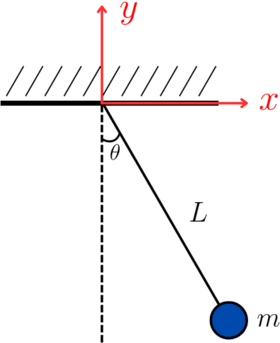



## **1.1. Multiplicadores de Lagrange**




A equação de vínculo parametrizada em coordenadas $x$ e $y$ é uma função $f(x,y)$ dada por:

$$ f(x,y) = x^2 + y^2 - L^2 = 0 $$

A energia cinética é dada é uma função de $\dot{x}$ e $\dot{y}$ do tipo:

$$ T(\dot{x},\dot{y}) = \frac{1}{2}m \dot x ^2+ \frac{1}{2}m \dot y^2 $$

E a energia potencial, com referencial no ponto fixo, é uma função apenas de $y$ do tipo:

$$ V(y) = -mgy $$

Assim, a Lagrangiana $\mathcal{L}$ é dada por:

$$ \mathcal{L}(y,\dot{x},\dot{y}) = T(\dot{x},\dot{y}) - V(y) $$
$$ \mathcal{L}(y,\dot{x},\dot{y}) = \frac{1}{2}m (\dot x^2 + \dot y^2) + mgy $$



In [2]:
# Definindo as variáveis do problema
# Tempo "t", Comprimento "L", Massa "m", Gravidade "g", Altura "h"
t, L, m, g, h = smp.symbols('t, L, m, g, h', real=True)
# x e y -> Coordenadas não-generalizadas
x, y = smp.symbols('x, y', cls=smp.Function)
# Multiplicador de Lagrange
lbda = smp.symbols('\lambda',real=True)

In [3]:
# Criando os deslocamentos
x = x(t)
y = y(t)

# Criando as velocidades
xdot = smp.diff(x,t)
ydot = smp.diff(y,t)

# Criando as acelerações
xddot = smp.diff(xdot,t)
yddot = smp.diff(ydot,t)

In [4]:
# Equação do vínculo holônomo
cnstr = x**2 + y**2 - L**2
cnstr

-L**2 + x(t)**2 + y(t)**2

In [5]:
# Definindo a energia cinética
T = (1/2)*m*(xdot**2 + ydot**2)
# Definindo a energia potencial
V = -m*g*y
# Definindo a Lagrangiana
Lag = T - V
Lag

g*m*y(t) + 0.5*m*(Derivative(x(t), t)**2 + Derivative(y(t), t)**2)

Define-se então as Equações de Euler-Lagrange com multiplicador de Lagrange:

* $k = 2$ coordenadas ($x$,$y$)
* $p = 1$ vínculo

$$ \mathcal L(y,\dot{x},\dot{y}) = \frac{1}{2}m (\dot x^2 + \dot y^2) + mgy $$

* Para $q_1 = x~(k=1)$

$$ a_{11} = \frac{\partial f}{\partial x} = 2x $$

$$\frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{x}}\right) - \frac{\partial \mathcal{L}}{\partial x} + \frac{\partial \mathcal{F}}{\partial \dot{x}} = 0$$

$$ m\ddot x =2 \lambda x $$

* Para $ q_2 = y~(k=2)$

$$ a_{12} = \frac{\partial f}{\partial y} = 2y $$

$$\frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{y}}\right) - \frac{\partial \mathcal{L}}{\partial y} + \frac{\partial \mathcal{F}}{\partial \dot{y}} = 0$$

$$ m\ddot y = 2\lambda y + mg $$

In [6]:
a11 = smp.diff(cnstr,x)
a12 = smp.diff(cnstr,y)

In [7]:
# k = 1 -> q1 = x
eq1 = (smp.diff(smp.diff(Lag,xdot),t) - smp.diff(Lag,x)) - lbda*a11
eq1

-2*\lambda*x(t) + 1.0*m*Derivative(x(t), (t, 2))

In [8]:
# k = 2 -> q2 = y
eq2 = (smp.diff(smp.diff(Lag,ydot),t) - smp.diff(Lag,y)) - lbda*a12
eq2

-2*\lambda*y(t) - g*m + 1.0*m*Derivative(y(t), (t, 2))

Obtém-se então 3 equações com 3 incógnitas $(x,y,\lambda)$:
\begin{align*}
m \ddot{x} - 2 \lambda x = 0 \\
m \ddot{y} - m g - 2 \lambda y = 0 \\
x^2 + y^2 - L^2 = 0 \\
\end{align*}

Isola-se $\ddot{x}$ na primeira equação:

In [9]:
xddot_ = smp.solve(eq1,xddot)[0]
xddot_

2.0*\lambda*x(t)/m

E na sequência isolamos $\ddot{y}$ na segunda equação:

In [10]:
yddot_ = smp.solve(eq2,yddot)[0]
yddot_

2.0*\lambda*y(t)/m + g

Próximo passo é obter as derivadas primeira e segunda do vínculo em função do tempo $\frac{d}{dt}f(x,y)$ e $\frac{d^2}{dt^2}f(x,y)$:

In [11]:
cnstr_dot = smp.diff(cnstr,t)
cnstr_dot

2*x(t)*Derivative(x(t), t) + 2*y(t)*Derivative(y(t), t)

In [12]:
cnstr_ddot = smp.diff(cnstr_dot,t)
cnstr_ddot

2*x(t)*Derivative(x(t), (t, 2)) + 2*y(t)*Derivative(y(t), (t, 2)) + 2*Derivative(x(t), t)**2 + 2*Derivative(y(t), t)**2

Substituindo $\ddot{x}$ e $\ddot{y}$ na equação acima, conseguimos isolar o multiplicador de Lagrange $\lambda$:

In [13]:
eq = 2*x*xddot_ + 2*y*yddot_ + 2*xdot**2 + 2*ydot**2
lbda_ = smp.solve(eq,lbda)[0]
lbda_

0.5*m*(-g*y(t) - Derivative(x(t), t)**2 - Derivative(y(t), t)**2)/(x(t)**2 + y(t)**2)

Reescrevendo:
$$\lambda = \frac{-m(gy + \dot{x}^2 + \dot{y}^2)}{2(x^2+y^2)} = \frac{-m(gy + \dot{x}^2 + \dot{y}^2)}{2L^2}$$

Com este $\lambda$ podemos substituí-lo nas equações $\hspace{3pt} \ddot{x} = \frac{2 \lambda x}{m} \hspace{3pt} $ e $\hspace{3pt} \ddot{y} = \frac{2 \lambda y}{m} + g \hspace{3pt} $ e obter estas variáveis em função apenas de $x,y,\dot{x},\dot{y}$:

$$ \ddot x = -\frac{x}{L^2}(\dot x^2 + \dot y^2 + gy) $$

$$ \ddot y = \frac{gx^2 - y(\dot{x}^2 + \dot{y}^2)}{L^2}$$

In [14]:
# Substituindo este lambda nas eq1 e eq2
xddot__ = smp.solve(eq1.subs(lbda,lbda_),xddot)[0]
xddot__

(-g*y(t) - Derivative(x(t), t)**2 - Derivative(y(t), t)**2)*x(t)/(x(t)**2 + y(t)**2)

In [15]:
yddot__ = smp.solve(eq2.subs(lbda,lbda_),yddot)[0]
yddot__

(g*x(t)**2 - y(t)*Derivative(x(t), t)**2 - y(t)*Derivative(y(t), t)**2)/(x(t)**2 + y(t)**2)

Assim podemos construir uma função para resolver via Runge-Kutta com condições iniciais similares a $\theta = 60^{\circ}$:

In [16]:
# Parâmetros do sistema
g = 9.81  # aceleração da gravidade
L = 1.0   # comprimento do pêndulo

# Intervalo de tempo para integração
t_start = 0.0
t_end = 2*np.pi*np.sqrt(L/g) # plotando um período
t_step = 0.001
t_span = np.arange(t_start, t_end, t_step)

# Ângulo inicial = 60°
theta0 = 60/180*np.pi

## LAGRANGE --------------------------------------------------------
def pendulum_lag(z, t):
    z1 = z[0] # x
    z2 = z[1] # dx
    z3 = z[2] # y
    z4 = z[3] # dy
    dz1_dt = z2
    dz2_dt = - z1 * (g * z3 + z2**2 + z4**2) / (z1**2 + z3**2)
    dz3_dt = z4
    dz4_dt = (g * z1**2 - z3 * z2**2 - z3 * z4**2) / (z1**2 + z3**2)
    return [dz1_dt, dz2_dt, dz3_dt, dz4_dt]

# Condições iniciais
z0 = [L*np.sin(theta0), 0.0, L*np.cos(theta0), 0.0]  # dx(0),ddx(0),dy(0),ddy(0)

# Resolvendo o sistema de equações diferenciais
solution = odeint(pendulum_lag, z0, t_span)

# Obtendo as soluções para z1, z2, z3 e z4
x_sol = solution[:, 0]
y_sol = solution[:, 2]


## TRADICIONAL --------------------------------------------------------
def pendulum_an(z, t):
    theta = z[0]
    dtheta = z[1]
    dz1_dt = dtheta
    dz2_dt = -g/L*np.sin(theta)
    return [dz1_dt, dz2_dt]

# Condições iniciais
z0 = [theta0, 0.0]  # theta(0), dtheta(0)

# Resolvendo o sistema de equações diferenciais
solution_an = odeint(pendulum_an, z0, t_span)

# Obtendo as soluções para z1, z2
x_sol_an = L*np.sin(solution_an[:, 0])
y_sol_an = L*np.cos(solution_an[:, 0])

E assim obtemos a solução do pêndulo simples parametrizado com $x$ e $y$ via Multiplicadores de Lagrange:

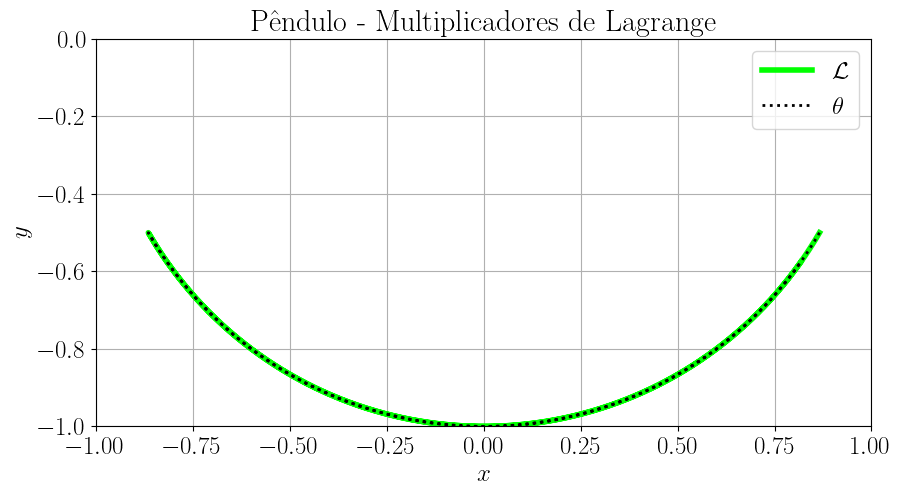

In [17]:
# Plotando as soluções
plt.figure(figsize=(10, 8))
plt.plot(x_sol, -y_sol, linestyle='-', color='lime', linewidth=4, label=r'$\mathcal{L}$')
plt.plot(x_sol_an, -y_sol_an, linestyle=':', color='black', linewidth=2, label=r'$\theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Pêndulo - Multiplicadores de Lagrange')
plt.legend()
plt.grid(True)
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,0.0)
plt.axis()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

## **1.2. Princípio de Hamilton**

O Princípio de Hamilton é dado por:
$$\int_{t_1}^{t_2}\sum_{k=1}^{N}\left[\frac{\partial \mathcal{L}}{\partial q_k} - \frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{q}_k}\right)\delta q_k\right] = 0$$

### **1.2.1. Parametrizando por $\theta$**

Sabe-se que as energias cinética e potencial desse sistema são dadas por:

* **Cinética:**

$$ T(\dot{\theta}) = \frac{1}{2} m {v_m}^2 = \frac{1}{2} m \dot{\theta}^2 L^2 $$
em que $v_m$ é a velocidade tangencial da massa $m$.

* **Potencial:**

$$ V(\theta) = - m g h = -mgL\cos(\theta)$$

Calculando-se a Lagrangina $\mathcal{L}$, obtém-se:

$$ \mathcal{L}(\theta,\dot{\theta}) = T(\dot{\theta}) - V(\theta)$$

$$\mathcal{L}(\theta,\dot{\theta}) = \frac{1}{2} m \dot{\theta}^2 L^2 + mgL\cos(\theta)$$

O Princípio de Hamilton é dado por:
$$\delta S = \int_{t_1}^{t_2}\sum_{k=1}^{N}\left[\frac{\partial \mathcal{L}}{\partial q_k} - \frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{q}_k}\right)\delta q_k\right]dt = 0$$

Parametrizando pela coordenada generalizada $\theta$, temos que $N = 1$. Assim, o princípio pode ser reescrito como:

$$\delta S = \int_{t_1}^{t_2}\left[\frac{\partial \mathcal{L}}{\partial q_1} - \frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{q}_1}\right)\delta q_1\right]dt = 0$$

Para que isso seja garantido, $\delta q_1 = 0$ ou $\frac{\partial \mathcal{L}}{\partial q_1} - \frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{q}_1}\right)=0$.

Assim, optamos pela segunda, substituindo $q_1$ por $q_\theta$:

$$ \frac{\partial \mathcal{L}}{\partial q_{\theta}} - \frac{d}{dt}\left (\frac{\partial \mathcal{L}}{\partial \dot{q}_\theta} \right ) = 0 $$
onde,

$$ \frac{\partial \mathcal{L}}{\partial q_{\theta}} = -mgL\sin(\theta)$$

$$ \frac{d}{dt}\left (\frac{\partial \mathcal{L}}{\partial \dot{q}_\theta} \right ) = m\ddot{\theta}L^2 $$
então,

$$ \frac{\partial \mathcal{L}}{\partial q_{\theta}} - \frac{d}{dt}\left (\frac{\partial \mathcal{L}}{\partial \dot{q}_\theta} \right ) = -m\ddot{\theta}L^2 - mgL\sin(\theta) = 0 $$

$$ m\ddot{\theta}L^2 + mgL\sin(\theta) = 0 ~~\div mL^2$$

$$\therefore~~\boxed{\ddot{\theta} + \frac{g}{L}\sin(\theta) = 0}$$
que é a mesma equação do pêndulo encontrada pela mecânica newtoniana.

### **1.2.2. Parametrizando por $x$ e $y$**

In [18]:
# Definindo as variáveis do problema
# Tempo "t", Comprimento "L", Massa "m", Gravidade "g"
t, L, m, g = smp.symbols('t, L, m, g', real=True)
# x e y -> Coordenadas não-generalizadas
x, y = smp.symbols('x, y', cls=smp.Function)
# deltax e deltay -> deslocamentos virtuais
deltax, deltay = smp.symbols('\delta_x, \delta_y',real=True)

In [19]:
# Criando os deslocamentos
x = x(t)
y = y(t)

# Criando as velocidades
xdot = smp.diff(x,t)
ydot = smp.diff(y,t)

# Criando as acelerações
xddot = smp.diff(xdot,t)
yddot = smp.diff(ydot,t)

A vinculação já apresentada é do tipo holônoma:

$$f(x,y) = x^2 + y^2 - L^2 = 0$$

In [20]:
# Vínculo holônomo
cnstr = x**2 + y**2 - L**2
cnstr

-L**2 + x(t)**2 + y(t)**2

Já se sabe também que a Lagrangiana em função de $x$ e $y$ é dada por:

$$\mathcal{L}(y,\dot{x},\dot{y}) = \frac{1}{2}m(\dot{x}^2 + \dot{y}^2) + mgy$$

In [21]:
# Definindo a energia cinética
T = (1/2)*m*(xdot**2 + ydot**2)
# Definindo a energia potencial
V = -m*g*y
# Definindo a Lagrangiana
Lag = T - V
Lag

g*m*y(t) + 0.5*m*(Derivative(x(t), t)**2 + Derivative(y(t), t)**2)

Na sequência desenvolvemos o pêndulo pelo Princípio de Hamilton até obtermos uma expressão que relacione $\delta x$ e $\delta y$:

$$\delta S = \delta \int_{t_1}^{t_2} \mathcal{L} dt = 0$$

$$\delta S = \int_{t_1}^{t_2} \left(\frac{\partial\mathcal{L}}{\partial x}\delta x + \frac{\partial\mathcal{L}}{\partial \dot{x}}\delta \dot{x} + \frac{\partial\mathcal{L}}{\partial y}\delta y + \frac{\partial\mathcal{L}}{\partial \dot{y}}\delta \dot{y}\right) dt = 0$$

$$\delta S = \int_{t_1}^{t_2} \left[\left(\frac{\partial\mathcal{L}}{\partial x} - \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{x}}\right)\delta x + \left(\frac{\partial\mathcal{L}}{\partial y} - \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{y}}\right)\delta y\right] dt = 0$$

$$\frac{\partial\mathcal{L}}{\partial x} = 0~,~~\frac{\partial\mathcal{L}}{\partial y} = mg~,~~\frac{\partial\mathcal{L}}{\partial \dot{x}} = m\dot{x}~,~~\frac{\partial\mathcal{L}}{\partial \dot{y}} = m\dot{y}$$

$$\delta S = \int_{t_1}^{t_2} \left[-m\ddot{x}\delta x + \left(mg - m\ddot{y}\right)\delta y\right] dt = 0$$

$$-m\ddot{x}\delta x + \left(mg - m\ddot{y}\right)\delta y = 0 ~~\div m$$

$$\boxed{-\ddot{x}\delta x + \left(g - \ddot{y}\right)\delta y = 0}$$

In [22]:
# Principio de Hamilton
dLdx = smp.diff(Lag,x)
dLdxdot = smp.diff(Lag,xdot)
dLdy = smp.diff(Lag,y)
dLdydot = smp.diff(Lag,ydot)

Ham_x = dLdx - smp.diff(dLdxdot,t)
Ham_y = dLdy - smp.diff(dLdydot,t)
Ham = smp.simplify(Ham_x*deltax + Ham_y*deltay)
Ham

m*(-1.0*\delta_x*Derivative(x(t), (t, 2)) + \delta_y*(g - 1.0*Derivative(y(t), (t, 2))))

Na sequência devemos garantir que o somatório abaixo é verdadeiro. E para isso, devemos calcular os termos $a_{lk}$ que são derivadas parciais do vínculo em relação às coordenadas não-generalizadas. No fim, encontraremos a relação direta entre $\delta x$ e $\delta y$.

$$\sum_{k=1}^{n}a_{lk}\delta q_k = 0~,~~l=1,~k=2$$

$$a_{11} \delta q_1 + a_{12} \delta q_2 = 0$$

$$q_1 = x \Rightarrow a_{11} = \frac{\partial f}{\partial x} = 2x$$
$$q_2 = y \Rightarrow a_{12} = \frac{\partial f}{\partial y} = 2y$$

$$2x \delta x + 2y \delta y = 0$$

$$\therefore~~\boxed{\delta y = -\frac{x}{y}\delta x}$$

In [23]:
# Calculando o somatório
a11 = smp.diff(cnstr,x)
a12 = smp.diff(cnstr,y)

sum_alk = a11*deltax + a12*deltay
deltay_ = smp.solve(sum_alk,deltay)[0]
deltay_

-\delta_x*x(t)/y(t)

Substituindo a devida relação na equação obtida anteriormente, podemos obter a expressão do movimento para $\ddot{x}$.

$$-\ddot{x}\delta x - \left(g - \ddot{y}\right)\left(\frac{x}{y}\right)\delta x = 0$$

$$\left[-\ddot{x} - \left(g - \ddot{y}\right)\left(\frac{x}{y}\right)\right]\delta x = 0$$

$$-\ddot{x} - \left(g - \ddot{y}\right)\left(\frac{x}{y}\right) = 0 ~~ \times y$$

$$-\ddot{x}y - \left(g - \ddot{y}\right)x = 0$$

$$\boxed{\ddot{x}=\frac{- \left(g - \ddot{y}\right)x}{y} = 0}$$

In [24]:
equation = Ham.subs(deltay,deltay_)
equation = equation.subs(deltax,1)
equation_simp = smp.solve(equation,xddot)[0]
equation_simp

(-g + Derivative(y(t), (t, 2)))*x(t)/y(t)

Com o intuito de se substituir $\ddot{y}$ na equação acima, utilizamos a já conhecido equação de vínculo para se obter uma expressão que seja exclusivamente função de $x$.

$$y = \sqrt{L^2 - x^2}$$

$$\dot{y} = -\frac{x \dot{x}}{\sqrt{L^2 - x^2}}$$

$$\ddot{y} = \frac{- L^{2} x \ddot{x} - L^{2} \dot{x}^{2} + x^{3} \ddot{x}}{\left(L^{2} - x^{2}\right)^{\frac{3}{2}}}$$

In [25]:
y_ = smp.solve(cnstr,y)[1]
y_dot = smp.diff(y_,t)
y_ddot = smp.simplify(smp.diff(y_dot,t))
y_ddot

(-L**2*x(t)*Derivative(x(t), (t, 2)) - L**2*Derivative(x(t), t)**2 + x(t)**3*Derivative(x(t), (t, 2)))/(L**2 - x(t)**2)**(3/2)

Substituindo esse $\ddot{y}$ na equação anterior, podemos obter uma função exclusivamente em função de $x$.

In [26]:
x_ddot = smp.solve(equation_simp.subs(yddot,y_ddot),xddot)[0]
x_ddot

(-L**2*Derivative(x(t), t)**2 - g*(L**2 - x(t)**2)**(3/2))/((L**2 - x(t)**2)*x(t))

E, finalmente pode-se plotar a trajetória.

Mas, temos um grande porém. Por questões algébricas, para valores negativos de $x$ a integração falha, e por esse motivo só se pode obter metade da trajetória. **Este é um problema ao se parametrizar com coordenadas não-generalizadas.**

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-27-a6263abd6491>:31: RuntimeWarning: overflow encountered in square
  y_sol = np.sqrt(L**2 - x_sol**2)
<ipython-input-27-a6263abd6491>:31: RuntimeWarning: invalid value encountered in sqrt
  y_sol = np.sqrt(L**2 - x_sol**2)


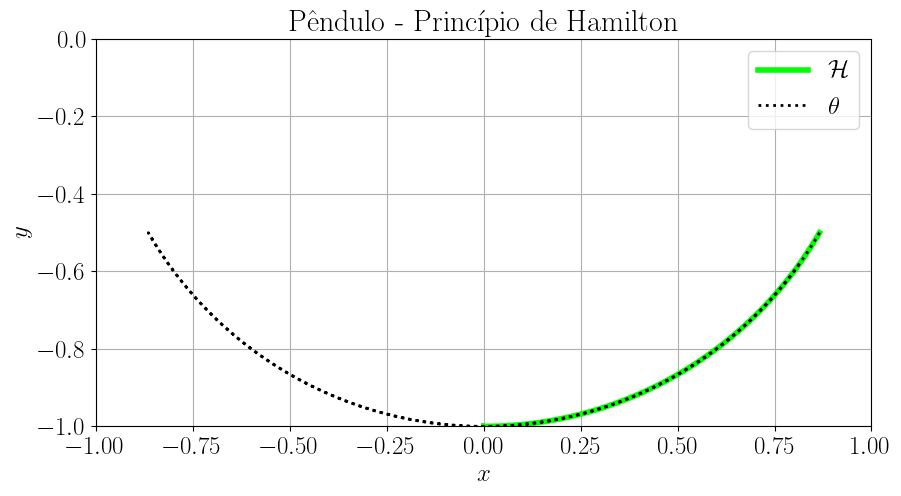

In [27]:
# Parâmetros do sistema
g = 9.81  # aceleração da gravidade
L = 1.0   # comprimento do pêndulo

# Intervalo de tempo para integração
t_start = 0.0
t_end = 2*np.pi*np.sqrt(L/g) # plotando um período
t_step = 0.001
t_span = np.arange(t_start, t_end, t_step)

# Ângulo inicial = 60°
theta0 = 60/180*np.pi

## HAMILTON --------------------------------------------------------
def pendulum_ham(z, t):
    x = z[0]
    dx = z[1]
    dz1dt = dx
    dz2dt = -L**2*g*np.sqrt(L**2 - x**2)/(L**2*x - x**3) - L**2*dx**2/(L**2*x - x**3) + g*np.sqrt(L**2 - x**2)*x**2/(L**2*x - x**3)
    return [dz1dt, dz2dt]

# Condições iniciais
z0 = [L*np.sin(theta0), 0.0]  # x(0), dx(0)

# Resolvendo o sistema de equações diferenciais
solution = odeint(pendulum_ham, z0, t_span)

# Obtendo as soluções
x_sol = solution[:, 0]
# y_sol = solution[:, 1]
y_sol = np.sqrt(L**2 - x_sol**2)

## TRADICIONAL --------------------------------------------------------
def pendulum_an(z, t):
    theta = z[0]
    dtheta = z[1]
    dz1_dt = dtheta
    dz2_dt = -g/L*np.sin(theta)
    return [dz1_dt, dz2_dt]

# Condições iniciais
z0 = [theta0, 0.0]  # theta(0), dtheta(0)

# Resolvendo o sistema de equações diferenciais
solution_an = odeint(pendulum_an, z0, t_span)

# Obtendo as soluções para z1, z2
x_sol_an = L*np.sin(solution_an[:, 0])
y_sol_an = L*np.cos(solution_an[:, 0])

# Plotando as soluções
plt.figure(figsize=(10, 8))
plt.plot(x_sol, -y_sol, linestyle='-', color='lime', linewidth=4, label=r'$\mathcal{H}$')
plt.plot(x_sol_an, -y_sol_an, linestyle=':', color='black', linewidth=2, label=r'$\theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Pêndulo - Princípio de Hamilton')
plt.legend()
plt.grid(True)
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,0.0)
plt.axis()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

## **1.3. Equações de Voronec**

* A energia **cinética** é dada por:
$$ T(\dot{x},\dot{y}) = \frac{1}{2}m \dot x ^2+ \frac{1}{2}m \dot y^2 $$

* Já a energia **potencial** é dada por:
$$ V(y) = -mgy $$

* Assim, a **Lagrangiana** é:
$$
\mathcal{L}=\frac{1}{2}m\left(\dot{x}^{2}+\dot{y}^{2}\right) + mgy
$$

* A vinculação é do tipo **holônoma**, tal que:

$$ f(x,y) = x^2 + y^2 - L^2 = 0 $$


* Definindo as **variáveis de configuração** do pêndulo:

$$q_1 = x \\
q_2 = y$$

* Definindo alguns **parâmetros** para a obtenção dos coeficiente do problema:

$$\begin{align}n &= 2~\text{(fixo)} \rightarrow \text{var. de configuração} \\
m &= 1~(\text{fixo}) \rightarrow \text{velocidades independentes}\\
k &= n - m = 1~(\text{fixo})\\
l &= (1~\text{até}~k) = (1,1)\\
j &= (1~\text{até}~m)= (1,1)\\
\nu &= (1~\text{até}~k) = (1,1)\end{align}$$

* Obtendo-se os termos de vínculo $a_{lj}$:

$$\dot{q}_{m+l} - \sum_{j=1}^{m} a_{lj} \dot{q}_j = 0,~l=1,\cdots,k$$

$$\dot{q}_{2} - a_{11}\dot{q}_1 = 0 \Rightarrow \dot{y} - a_{11}\dot{x} = 0 ~~\therefore~{\boxed{a_{11} = \frac{\dot{y}}{\dot{x}} }}$$

* Obtendo-se a **Lagrangiana reduzida**:

A partir da equação de vínculo podemos obter as respectivas diferenciações:
$$ f(x,y) = x^2 + y^2 - L^2 = 0 \\
\frac{d}{dt}f(x,y) = \frac{d}{dt}(x^2 + y^2 - L^2) = 0 \\
\frac{d}{dt}f(x,y) = 2x\dot{x} + 2y\dot{y} = 0 \Rightarrow \dot{y} = -\left(\frac{x}{y}\right)\dot{x}$$

Por fim, após isolar $\dot{y}$, substituímos na Lagrangiana original obtendo a Lagrangiana reduzida:
$$ \bar{\mathcal L} = \frac{1}{2}m\left\{\dot{x}^{2}+\left[-\left(\frac{x}{y}\right)\dot{x}\right]^{2}\right\} + mgy$$

* Assim, podemos finalmente obter as **Equações de Voronec**, conforme segue:
$$
\frac{d}{d t}\left(\frac{\partial \bar{\mathcal L}}{\partial \dot{q}_{i}}\right)-\frac{\partial \bar{\mathcal L}}{\partial q_{i}}=\sum_{\nu=1}^{k} \frac{\partial \bar{\mathcal L}}{\partial q_{m+\nu}} a_{\nu i}+ \sum_{\nu=1}^{k} \sum_{j=1}^{m} \frac{\partial \mathcal{L}}{\partial \dot{q}_{m+\nu}} b_{i j}^{\nu} \dot{q}_{j}~,~~ i=1, \ldots, m
$$

$$
b_{ij}^{\nu}=\frac{\partial a_{\nu i}}{\partial q_{j}}-\frac{\partial a_{\nu j}}{\partial q_{i}}+\sum_{\mu=1}^{k}\left(\frac{\partial a_{\nu i}}{\partial q_{m+\mu}} a_{\mu j}-\frac{\partial a_{\nu j}}{\partial q_{m+\mu}} a_{\mu i}\right){= 0\text{ (holonomo)}}
$$

$$
\frac{d}{d t}\left(\frac{\partial \bar{\mathcal L}}{\partial \dot{q}_{1}}\right)-\frac{\partial \bar{\mathcal L}}{\partial q_{1}}=\frac{\partial \bar{\mathcal L}}{\partial q_{2}} a_{11}~,~~\text{onde}~q_1 = x~\text{e}~q_2 = y
$$

$$
\therefore~~\boxed{\frac{d}{d t}\left(\frac{\partial \bar{\mathcal L}}{\partial \dot{x}}\right)-\frac{\partial \bar{\mathcal L}}{\partial x}=\frac{\partial \bar{\mathcal L}}{\partial y} a_{11}}
$$

In [28]:
# Definindo as variáveis do problema
t = smp.Symbol(r't')
L, m, g = smp.symbols('L, m, g', real=True) # Comprimento "L", Massa "m", Gravidade "g"
varS = ['x', 'y', r'\theta']

# Deslocamentos
x, y, theta = [smp.Function(varb)(t) for varb in varS]
disps = [x,y,theta]

# Velocidades
xdot, ydot, thetadot = [smp.diff(varb,t) for varb in disps]
vels = [xdot,ydot,thetadot]

# Acelerações
xddot, yddot, thetaddot = [smp.diff(varb,t) for varb in vels]

Novamente a vinculação holônoma é apresentada:

In [29]:
# Vínculo holônomo
f1 = x**2 + y**2 - L**2
f1_dot = smp.diff(f1,t)
f1_ddot = smp.diff(f1_dot,t)
f1_dot

2*x(t)*Derivative(x(t), t) + 2*y(t)*Derivative(y(t), t)

Isolando-se $\dot{y}$, obtemos:

In [30]:
ydot_ = smp.solve(f1_dot,ydot)[0]
ydot_

-x(t)*Derivative(x(t), t)/y(t)

Este $\dot{y}$ é então substituído na Lagrangiana original $\mathcal{L}$ de modo a obtermos a Lagrangiana reduzida $\bar{\mathcal{L}}$:

In [31]:
# Energia cinética
T = (1/2)*m*(xdot**2 + ydot_**2)
# Energia potencial
V = - m*g*y
# Lagrangiana reduzida
L_bar = T - V
L_bar

g*m*y(t) + 0.5*m*(x(t)**2*Derivative(x(t), t)**2/y(t)**2 + Derivative(x(t), t)**2)

Na sequência vamos obter os termos de vínculo $a_{\nu i}$, que neste caso é simplesmente dado por $a_{11}$:

In [32]:
# Termo de vínculo alj
a11 = ydot_/xdot
a11

-x(t)/y(t)

Realizando as devidas diferenciações e operações algébricas obtemos a Equação de Voronec para o pêndulo simples.

In [33]:
# Voronec
voronec = smp.diff(smp.diff(L_bar,xdot),t) - smp.diff(L_bar,x) - smp.diff(L_bar,y)*a11
voronec = smp.simplify(voronec)
voronec

1.0*m*(1.0*g*x(t)*y(t)**3 - 1.0*x(t)**3*Derivative(x(t), t)**2 + 1.0*x(t)**2*y(t)**2*Derivative(x(t), (t, 2)) - 2.0*x(t)**2*y(t)*Derivative(x(t), t)*Derivative(y(t), t) + 1.0*x(t)*y(t)**2*Derivative(x(t), t)**2 + 1.0*y(t)**4*Derivative(x(t), (t, 2)))/y(t)**4

Ao se isolar $\ddot{x}$ na equação acima, obtemos:

In [34]:
xddot_ = smp.simplify(smp.solve(voronec,xddot)[0])
xddot_

-(g*y(t)**3 - x(t)**2*Derivative(x(t), t)**2 - 2.0*x(t)*y(t)*Derivative(x(t), t)*Derivative(y(t), t) + y(t)**2*Derivative(x(t), t)**2)*x(t)/((x(t)**2 + y(t)**2)*y(t)**2)

Desta forma podemos obter uma integração numérica do pêndulo e visualizar a sua trajetória através de uma formulação diferente que são é a Equação de Voronec.

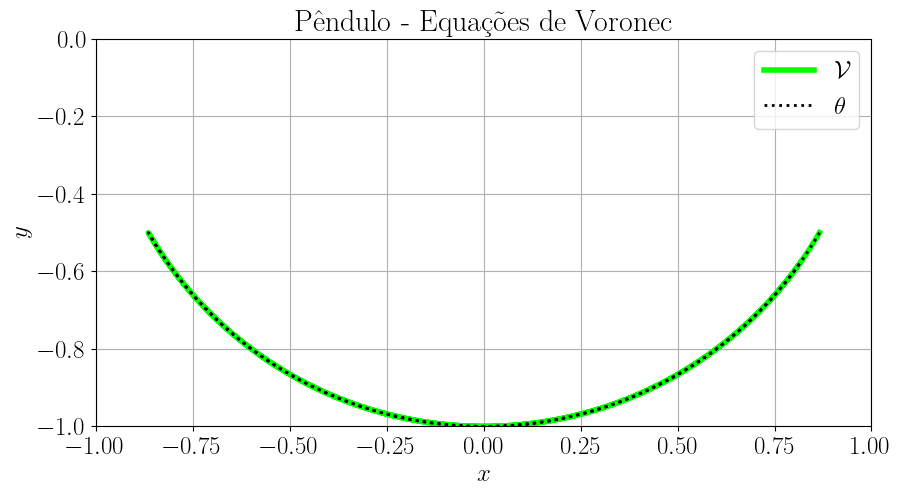

In [35]:
# Parâmetros do sistema
g = 9.81    # aceleração da gravidade [m/s²]
L = 1.0     # comprimento do pêndulo [m]
m = 1.0     # massa do pêndulo [kg]

# Intervalo de tempo para integração
t_start = 0.0
t_end = 2*np.pi*np.sqrt(L/g) # plotando um período
t_step = 0.001
t_span = np.arange(t_start, t_end, t_step)

# Ângulo inicial = 60°
theta0 = 60/180*np.pi

## VORONEC --------------------------------------------------------
def pendulum_vor(z, t):
    x, y, dx = z
    dy = -x/y*dx
    ddx = - (x*(g*y**3 - x**2*dx**2 - 2*x*y*dx*dy + y**2*dx**2))/((x**2 + y**2)*y**2)
    return [dx,dy,ddx]

# Condições iniciais
z0 = [L*np.sin(theta0), L*np.cos(theta0), 0.0]

# Resolvendo o sistema de equações diferenciais
solution = odeint(pendulum_vor, z0, t_span)

# Obtendo as soluções
x_sol = solution[:, 0]
y_sol = np.sqrt(L**2 - x_sol**2)

## TRADICIONAL --------------------------------------------------------
def pendulum_an(z, t):
    z1 = z[0]
    z2 = z[1]
    dz1_dt = z2
    dz2_dt = -g/L*np.sin(z1)
    return [dz1_dt, dz2_dt]

# Condições iniciais
z0 = [theta0, 0.0]  # z1(0), z2(0)

# Resolvendo o sistema de equações diferenciais
solution_an = odeint(pendulum_an, z0, t_span)

# Obtendo as soluções para z1, z2
x_sol_an = L*np.sin(solution_an[:, 0])
y_sol_an = L*np.cos(solution_an[:, 0])

## PLOTANDO --------------------------------------------------------
# Plotando as soluções
plt.figure(figsize=(10, 8))
plt.plot(x_sol, -y_sol, linestyle='-', color='lime', linewidth=4, label=r'$\mathcal{V}$')
plt.plot(x_sol_an, -y_sol_an, linestyle=':', color='black', linewidth=2, label=r'$\theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Pêndulo - Equações de Voronec')
plt.legend()
plt.grid(True)
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,0.0)
plt.axis()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

# **2. Hamiltonianas**

Neste tópico iremos apresentar o processo de obtenção das Hamiltonianas de dois sistemas diferentes. O principal objetivo é mostrar quando a Hamiltoniana se conserva e quando não.

## **2.1. Pêndulo simples**

Sabe-se que as energias cinética e potencial desse sistema são dadas por:

* **Cinética:**

$$ T(\dot{\theta}) = \frac{1}{2} m {v_m}^2 = \frac{1}{2} m \dot{\theta}^2 L^2 $$
em que $v_m$ é a velocidade tangencial da massa $m$

* **Potencial:**

$$ V(\theta) = - m g h = -mgL\cos(\theta) $$

Calculando-se a Lagrangina $\mathcal{L}$, obtém-se:

$$ \mathcal{L}(\theta,\dot{\theta}) = T - V = \frac{1}{2} m \dot{\theta}^2 L^2 + mgL\cos(\theta) $$


Aplicando-se a Transformada de Legendre na Lagrangiana:

$$ p_\theta = \frac{\partial \mathcal{L}}{\partial \dot{\theta}} = m \dot{\theta}L^2 $$

$$ \mathcal{H} = p_\theta \dot{q} - \mathcal{L} = m\dot{\theta}^2L^2 - \left ( \frac{1}{2}m\dot{\theta}^2L^2 + mgL\cos(\theta) \right ) $$



Portanto, a Hamiltoniana obtida é:

$$ \mathcal{H} = \frac{1}{2} m \dot{\theta}^2 L^2 - mgL\cos(\theta) $$

que é o próprio resultado da soma das energias cinética e potencial:

$$ \mathcal{H} = T + V $$

As Equações de Hamilton são descritas por:

$$ \dot{q}_i = \frac{\partial \mathcal{H}}{\partial p_i}  ; \hspace{10pt} \dot{p}_i = - \frac{\partial \mathcal{H}}{\partial q_i} $$

Em função da coordenada generalizada $\theta$, tem-se:

$$ \dot{\theta} = \frac{\partial \mathcal{H}}{\partial p_\theta}  ; \hspace{10pt} \dot{p}_\theta = - \frac{\partial \mathcal{H}}{\partial \theta} $$



Voltando na Hamiltoniana do problema:

$$ \boxed{\dot{\theta} = \frac{p_\theta}{mL^2} ; \hspace{10pt} \dot{p}_\theta = -mgL\sin(\theta) } $$

Derivando-se $ \hspace{3pt} \dot{\theta} = \frac{p_\theta}{mL^2} \hspace{3pt}$ em relação ao tempo:

$$ \dot{p}_\theta = mL^2\ddot{\theta} $$

Voltando na expressão de $ \hspace{3pt} \dot{p}_\theta = -mgL\sin(\theta)$, chega-se na equação do pêndulo simples:

$$ \ddot{\theta} + \frac{g}{L}\sin{\theta} = 0 $$

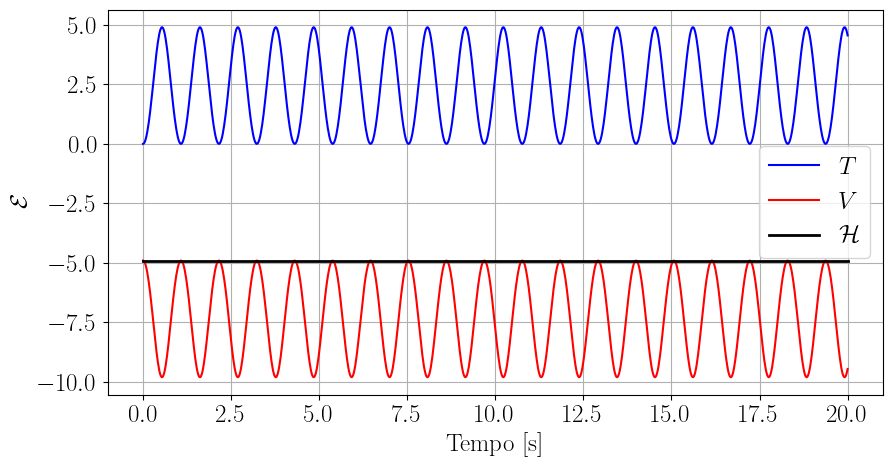

In [36]:
# Definindo as variáveis do problema
L = 1.0                     # comprimento do fio [m]
g = 9.81                    # aceleração gravitacional [m/s^2]
m = 1.0                     # massa da esfera [kg]
N = 1000                    # numero de amostras para simular
t = np.linspace(0,20,N)     # vetor tempo

def pendulo(z,t,L,m,g):
    theta = z[0]
    p = z[1]
    dot_theta = p/(m*(L**2))
    dot_p = -m*g*L*np.sin(theta)
    dot_z = [dot_theta,dot_p]
    return dot_z

theta0 = np.pi/3            # condição inicial theta
p0 = 0                      # condição inicial para p
z0 = [theta0,p0]
z = odeint(pendulo,z0,t,args=(L,m,g))

p = z[:,1]
theta = z[:,0]

# Energia cinética
T = 0.5*m*((p/(m*L**2))**2)*L**2
# Energia potencial
V = -m*g*L*np.cos(theta)
# Hamiltoniana
H = T+V

plt.figure(figsize=(10,5))
plt.plot(t,T,color = 'b',linewidth=1.5,label='$T$')
plt.plot(t,V,color = 'r',linewidth=1.5,label='$V$')
plt.plot(t,H,color = 'k',linewidth=2,label='$\mathcal{H}$')
plt.ylabel("$\mathcal{E}$")
plt.xlabel("Tempo [s]")
plt.grid(True)
plt.axis()
plt.legend()
plt.show()

## **2.2. Aro**

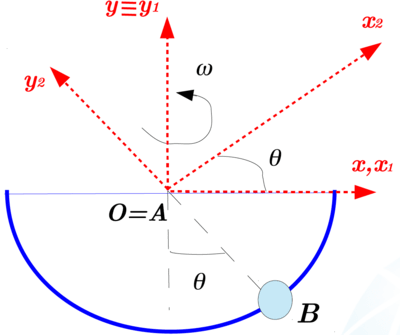

Partindo-se do Trabalho 2, no qual encontramos a velocidade do ponto B como sendo:
$$\begin{matrix}{\vec{v}_B} = \begin{Bmatrix} r\dot{\theta}\cos(\theta) \\ r\dot{\theta}\sin(\theta) \\ -\omega r \sin(\theta) \end{Bmatrix}\end{matrix}$$
vetor esse cuja norma nos fornece:
$$|{\vec{v}_B}| = v_B = \sqrt{r^2 \left(\dot{\theta}^2+\omega^2\sin^2(\theta)\right)}$$

Sabe-se que as energias cinética e potencial desse sistema são dadas por:

* **Cinética:**

$$ T = \frac{1}{2} m {|\vec{v}_B|}^2 = \frac{1}{2}mr^2 \left (\dot{\theta}^2 + \omega^2 \sin^2(\theta) \right ) $$

* **Potencial:**
    * A energia potencial nesse caso é a mesma para o caso anterior, isto é, de um pêndulo simples:

$$ V = - m g h = -mgr\cos(\theta) $$

Calculando-se a Lagrangina $\mathcal{L}$, obtém-se:

$$ \mathcal{L} = T - V = \frac{1}{2} m r^2 \left (\dot{\theta}^2 + \omega^2 \sin^2(\theta) \right ) + mgr\cos(\theta) $$

Aplicando-se a Transformada de Legendre na Lagrangiana:

$$ p_\theta = \frac{\partial \mathcal{L}}{\partial \dot{\theta}} = m \dot{\theta}r^2 $$

$$ \mathcal{H} = p_\theta \dot{q} - \mathcal{L} = m\dot{\theta}^2r^2 - \left[\frac{1}{2} m r^2 \left (\dot{\theta}^2 + \omega^2 \sin^2(\theta) \right ) + mgr\cos(\theta) \right] $$

Portanto, a Hamiltoniana obtida é:

$$ \mathcal{H} = \frac{1}{2} mr^2 \left (\dot{\theta}^2 - \omega^2 \sin^2(\theta) \right) - mgr\cos(\theta) $$

Comparando o resultado obtido acima com a soma das energias cinética e potencial, nota-se que ambos são diferentes:

$$ T + V = \frac{1}{2}mr^2 \left (\dot{\theta}^2 + \omega^2 \sin^2(\theta) \right ) - mgr\cos(\theta)$$

$$ \therefore \boxed{\mathcal{H} \neq T + V} $$
